# Fitting Stuff

The generic physics experiment goes as follows:  we measure some quantity, $y$, as a function of some other quantity, $x$.  We plot that data, and then we attempt to find a function, $y_{fit} = f(x)$ that best describes the data.

In addition, in most (maybe all?) experiments, we have uncertainties,$\delta y$, associated with each data point.  We should understand more about how this affects the fitting procedure.

One of the oldest and still more relied upon methods for determining the optimal parameters of the fitting function is a method called "Ordinary Least Squares".  The basic theory behind this is.  We first define a measure of the goodness of the fit:

$\chi^2 = \sum_i^N (y_i - y_{fit}(x_i))^2$

Note that $y_{fit}(x)$ necessarily depends on some number of parameters, $(a,b,c,...)$. For example, for a quadratic fitting function, we might have that:

$y_{fit}(x) = a x^2 + b x + c$

In order to make $\chi^2$ as small as possible, i.e. find its $minimum$ value, we must solve the set of equations defined by:

$\frac{\partial \chi^2}{\partial a} = 0, \frac{\partial \chi^2}{\partial b} = 0, \frac{\partial \chi^2}{\partial c} = 0, ...$

As it turns out, is the case of polynomial fitting functions (of any order), the values of the polynomial coefficients are uniquely defined.  That is, there is a single global minimum in the $\chi^2$ function.  For other non-linear fitting functions, there may be local minima in the $\chi^2$ function, and this requires that we provide initial starting values for the parameters of the fitting function that are close to the global minimum.

When we have uncertainties for each of the $N$ data points, the definition of $\chi^2$ becomes:

$\chi^2 = \sum_i^N \left (\frac{y_i - y_{fit}(x_i)}{\sigma_i}\right)^2$

### Let us now investigate how uncertainties affect both (a) the fit parameters and (b) the confidence interval on the fit.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# The following lines make plots in dark mode look reasonable.  If you are not using dark
# mode you don't need them, but you can also just leave them here and it should work fine.

dark_mode = True
# plotting choices for dark-mode
if (dark_mode):
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    linecolor = 'w'
else:
    linecolor = 'k'

In [2]:
# create some fake data

npts = 11
xlow = 0.5
xhigh = 5.5

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)

# The "equation" that we will fit in all of these examples is the line y=x.  Thus, we expect,
# in all cases, a slope of 1 and a y-intercept of 0.
yi = xi + yrandom

Text(0.5, 1.0, 'No Uncertainties')

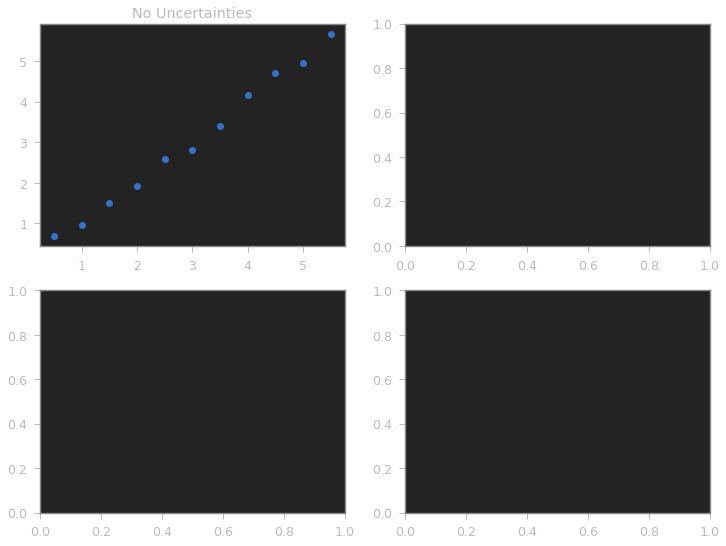

In [3]:
plt.rcParams["figure.figsize"] = (12,9)


figure, axis = plt.subplots(2, 2)
plot1 = plt.subplot2grid((2, 2), (0, 0), rowspan=1, colspan=1)
plot2 = plt.subplot2grid((2, 2), (0, 1), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((2, 2), (1, 0), rowspan=1, colspan=1)
plot4 = plt.subplot2grid((2, 2), (1, 1), rowspan=1, colspan=1)

plot1.plot(xi,yi,'o')
plot1.set_title("No Uncertainties")


## Case 1:  Linear Fit with No Uncertainties

Coefficients (from curve_fit)
[-0.0107611  1.0143077]
Covariance Matrix (from curve_fit)
[[ 0.00861959 -0.00224859]
 [-0.00224859  0.00074953]]

Final Result: y = (1.01 +/- 0.03) x + (-0.01 +/- 0.09)


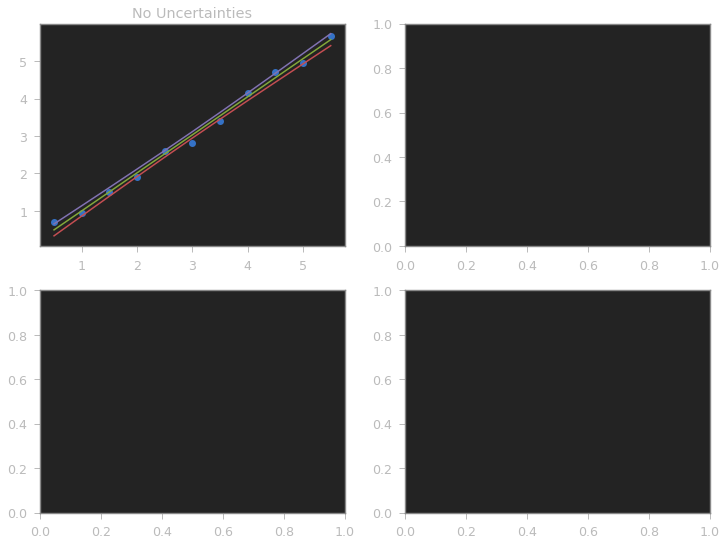

In [4]:
from scipy.optimize import curve_fit

# define a linear fit function
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

# initialize the parameters of the fitting function (to zero)
init_vals = [0.0 for x in range(2)]

# call the curve fitting routine, passing to it the name of the fitting function,
# the data to be fit (x,y), and the array of initial values of the parameters. Curve_fit
# returns an array of the optimized parameters (popt), and the covariance matrix
# of the fit.  The errors on the fit parameters are given by the square root of the diagonal
# elements of the covariance matrix!
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

# We want to visualize not only the line of best fit, but also the lines that correspond
# to "band" of fit lines that correspond to the 95% confidence level of the fit.
#
# I am not going to go into great detail on how this works here :)  If you want to learn
# more about this, I suggest you take Physics 421 or 441 at some point!
#
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

# Finally print out the coefficients, covariance matrix, and final results!
print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

# Since we are going to be comparing the results of fitting different data sets, create
# and stat to fill some arrays to hold the fit results - (slope +/- dslope), (yint +/ dyint)
slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('None')

plt.rcParams["figure.figsize"] = (12,9)

plot1.plot(xi,middle)
plot1.plot(xi,lower)
plot1.plot(xi,upper)

figure

## Case 2:  Linear Fit with Uniform Uncertainties

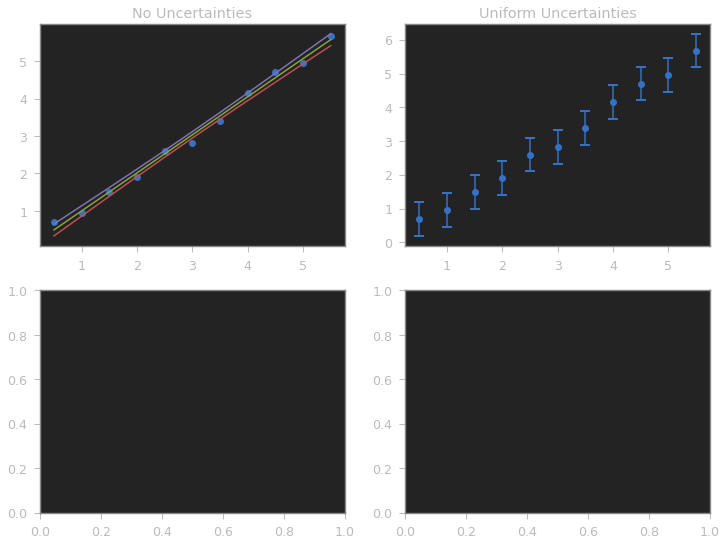

In [5]:
sigmai = np.array([0.5 for i in range(npts)])
plot2.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)
plot2.set_title("Uniform Uncertainties")

figure

Coefficients (from curve_fit)
[-0.0107611  1.0143077]
Covariance Matrix (from curve_fit)
[[ 0.00861959 -0.00224859]
 [-0.00224859  0.00074953]]

Final Result: y = (1.01 +/- 0.03) x + (-0.01 +/- 0.09)


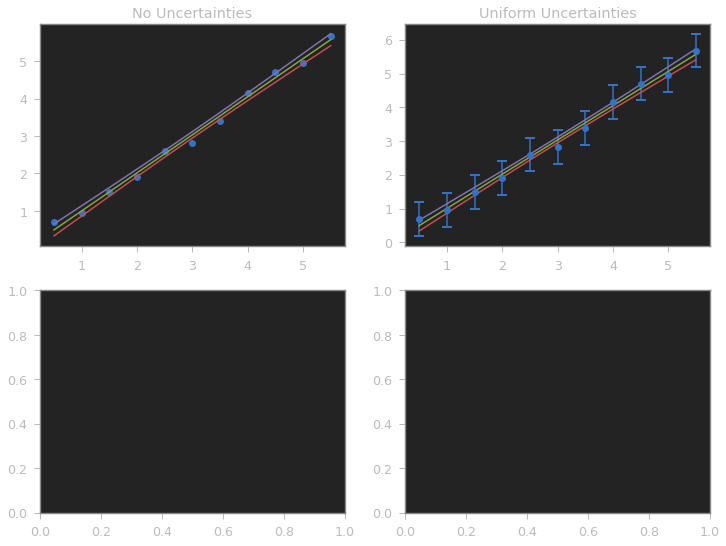

In [6]:
init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plot2.plot(xi,middle)
plot2.plot(xi,lower)
plot2.plot(xi,upper)



slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Uniform')

figure

## Case 3:  Linear Fit with Increasing Uncertainties

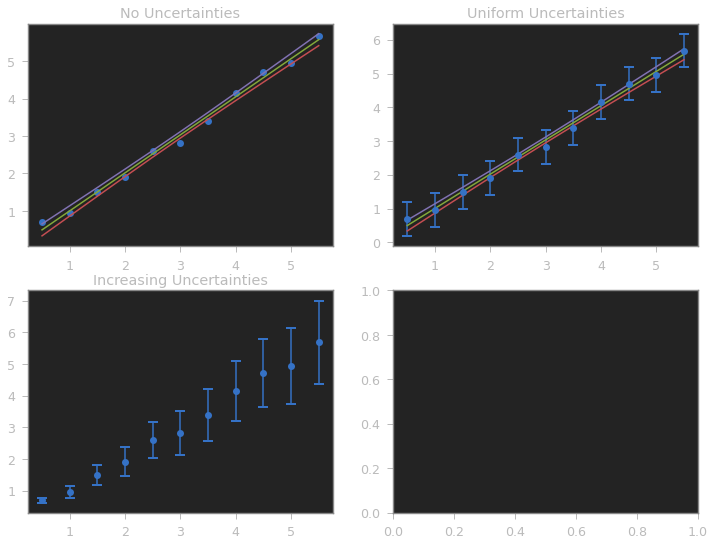

In [7]:
xl = xlow + 0.1
sigmai = np.array([0.1 + 0.25*(xi[i]-xl) for i in range(npts)])
plot3.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)
plot3.set_title("Increasing Uncertainties")

figure

Coefficients (from curve_fit)
[0.20920871 0.91619133]
Covariance Matrix (from curve_fit)
[[ 0.00150343 -0.00109577]
 [-0.00109577  0.0014482 ]]

Final Result: y = (0.92 +/- 0.04) x + (0.21 +/- 0.04)


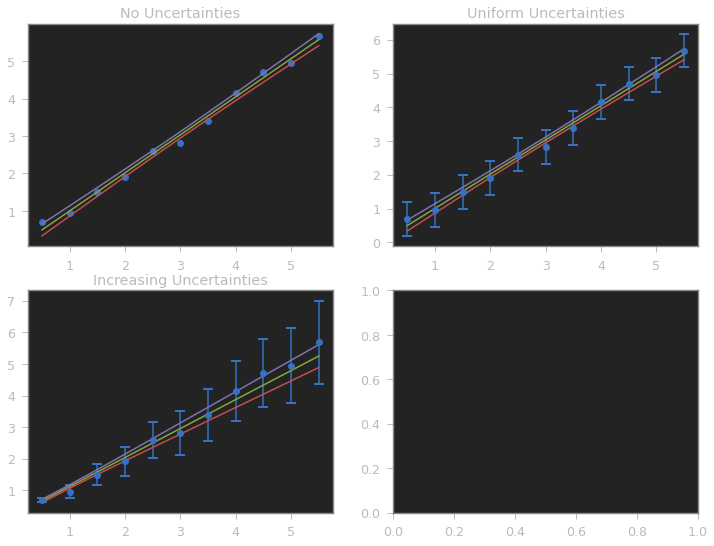

In [8]:
init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plot3.plot(xi,middle)
plot3.plot(xi,lower)
plot3.plot(xi,upper)

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Increasing')

figure

## Case 4:  Linear Fit with Increasing Uncertainties at Endpoints

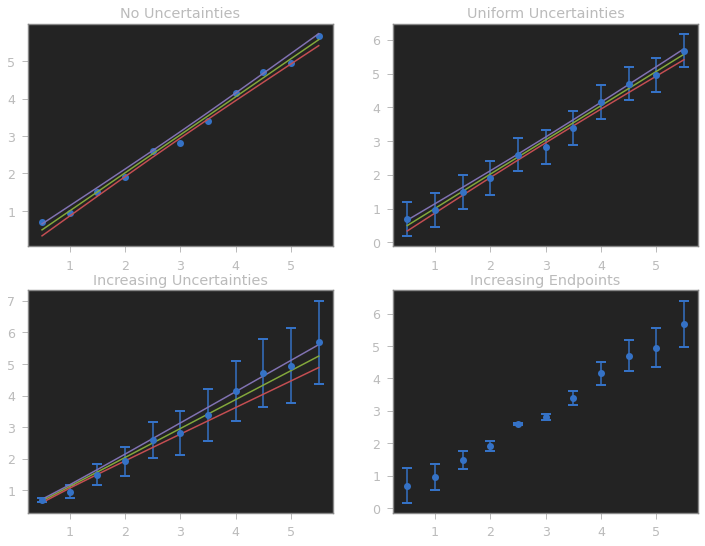

In [9]:
xmid = (xlow+xhigh)/2.0+0.01
sigmai = np.array([0.1+ 0.25*(xi[i]-xmid) for i in range(npts)])
plot4.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)
plot4.set_title("Increasing Endpoints")

figure

Coefficients (from curve_fit)
[0.23131831 0.93657258]
Covariance Matrix (from curve_fit)
[[ 0.04054289 -0.01571569]
 [-0.01571569  0.00619564]]

Final Result: y = (0.94 +/- 0.08) x + (0.23 +/- 0.20)


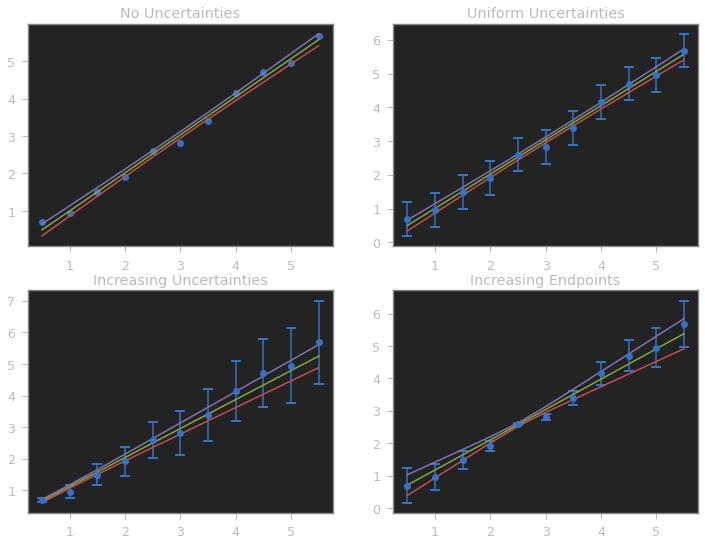

In [10]:
init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plot4.plot(xi,middle)
plot4.plot(xi,lower)
plot4.plot(xi,upper)

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Endpoints')

figure

## Preliminary Conclusions

1. If the uncertainties are uniform, there is no impact on the uncertainties in the fit parameters, the uncertainties in the fit parameters, or the confidence bands.  This can be understood mathematically by considering the dependence of $\chi^2$ on $\sigma_i$; if all $\sigma_i$ are the same, then there is no dependence of the derivatives of $\chi^2$ on $\sigma_i$.

2. If the uncertainties are non-uniform, the resulting fit parameters and confidence bands will depend upon the $\sigma_i$ in a complicated way!



In [11]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,None,1.014308,0.027378,-0.010761,0.092842
1,Uniform,1.014308,0.027378,-0.010761,0.092842
2,Increasing,0.916191,0.038055,0.209209,0.038774
3,Endpoints,0.936573,0.078712,0.231318,0.201353


## Case 5:  Determining the Y-intercept with increasing uncertainties at small x

In many experiments, the uncertainties increase as the independent variable ($x$) becomes small.  We seek to understand how best to design our experiment in these situations to optimize the determination of the y-intercept (at $x=0$).

(-3.0, 15.0)

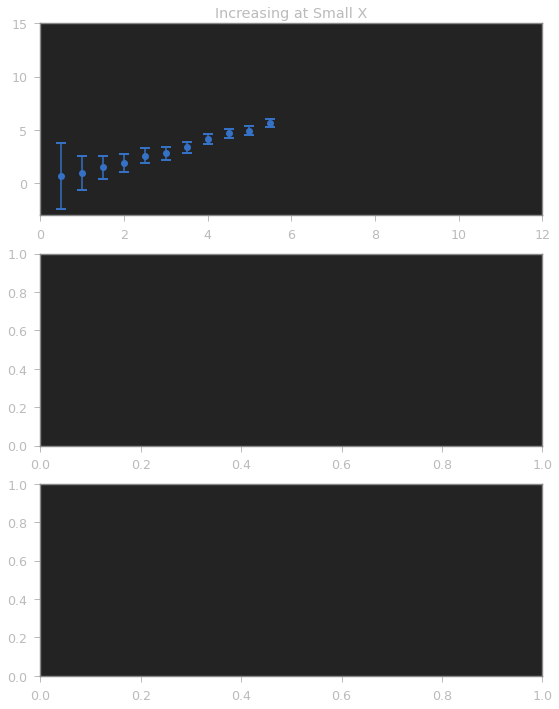

In [12]:
plt.rcParams["figure.figsize"] = (9,12)

figure2, axis = plt.subplots(3, 1)

plot1 = plt.subplot2grid((3, 1), (0, 0), rowspan=1, colspan=1)
plot2 = plt.subplot2grid((3, 1), (1, 0), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((3, 1), (2, 0), rowspan=1, colspan=1)


sigmai = np.array([0.1+ 1.5/np.abs(xi[i]) for i in range(npts)])
plot1.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)
plot1.set_title("Increasing at Small X")
plot1.set_xlim([0,12])
plot1.set_ylim([-3,15])


Coefficients (from curve_fit)
[-0.16499562  1.05304433]
Covariance Matrix (from curve_fit)
[[ 0.02267928 -0.00504844]
 [-0.00504844  0.00121169]]

Final Result: y = (1.05 +/- 0.03) x + (-0.16 +/- 0.15)


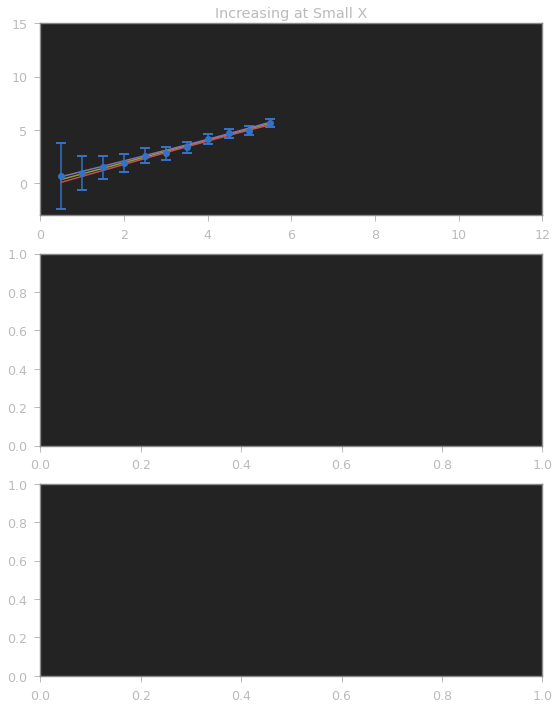

In [13]:
init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plot1.plot(xi,middle)
plot1.plot(xi,lower)
plot1.plot(xi,upper)

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Increasing at Small X')

figure2

## Preliminary Conclusion:  our knowledge of the y-intercept is very limited!

In [14]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,None,1.014308,0.027378,-0.010761,0.092842
1,Uniform,1.014308,0.027378,-0.010761,0.092842
2,Increasing,0.916191,0.038055,0.209209,0.038774
3,Endpoints,0.936573,0.078712,0.231318,0.201353
4,Increasing at Small X,1.053044,0.034809,-0.164996,0.150596


## Case 6:   Decrease the range of x - Focus on the small x region

What is the impact of taking the same amount of data as in the original experiment, but focusing on the small x region?

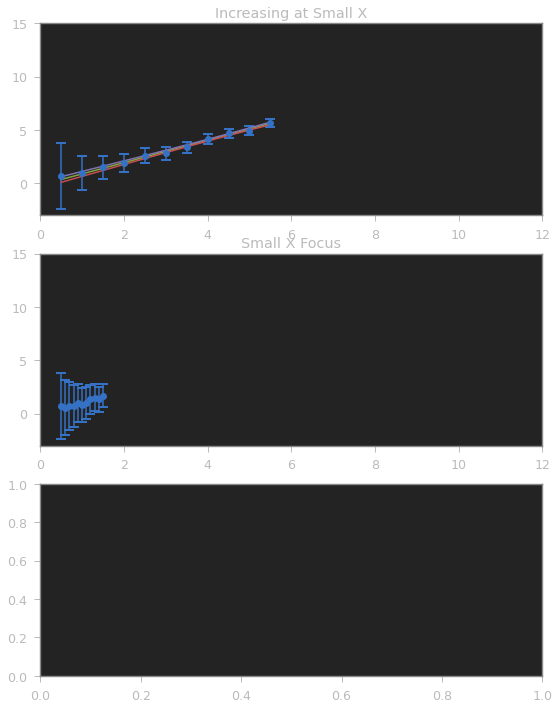

In [15]:
# create some fake data

npts = 11
xlow = 0.5
xhigh = 1.5

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yi = xi + yrandom

sigmai = np.array([0.1+ 1.5/np.abs(xi[i]) for i in range(npts)])
plot2.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)
plot2.set_title("Small X Focus")
plot2.set_xlim([0,12])
plot2.set_ylim([-3,15])

figure2

Coefficients (from curve_fit)
[-0.16878667  1.18548122]
Covariance Matrix (from curve_fit)
[[ 0.03357515 -0.02713947]
 [-0.02713947  0.02314664]]

Final Result: y = (1.19 +/- 0.15) x + (-0.17 +/- 0.18)


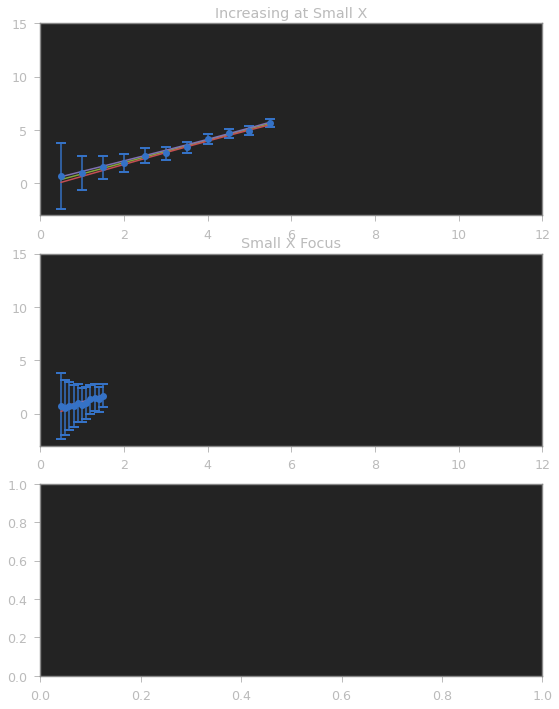

In [16]:
init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plot2.plot(xi,middle)
plot2.plot(xi,lower)
plot2.plot(xi,upper)

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Small X Range')

figure2

In [17]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head(10)

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,None,1.014308,0.027378,-0.010761,0.092842
1,Uniform,1.014308,0.027378,-0.010761,0.092842
2,Increasing,0.916191,0.038055,0.209209,0.038774
3,Endpoints,0.936573,0.078712,0.231318,0.201353
4,Increasing at Small X,1.053044,0.034809,-0.164996,0.150596
5,Small X Range,1.185481,0.152140,-0.168787,0.183235


## Case 7:   Increase the range of x - create a larger lever arm

What is the impact of taking the same amount of data as in the original experiment, but increasing the x range, so as to creat a larger lever arm?

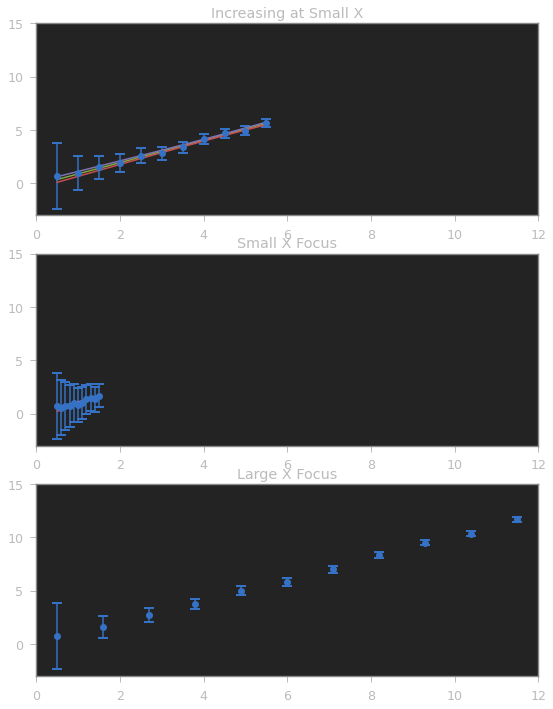

In [18]:
# create some fake data

npts = 11
xlow = 0.5
xhigh = 11.5

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yi = xi + yrandom

sigmai = np.array([0.1+ 1.5/np.abs(xi[i]) for i in range(npts)])
plot3.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)
plot3.set_title("Large X Focus")
plot3.set_xlim([0,12])
plot3.set_ylim([-3,15])

figure2

Coefficients (from curve_fit)
[-0.16062166  1.0251443 ]
Covariance Matrix (from curve_fit)
[[ 0.02006047 -0.00216769]
 [-0.00216769  0.00025512]]

Final Result: y = (1.03 +/- 0.02) x + (-0.16 +/- 0.14)


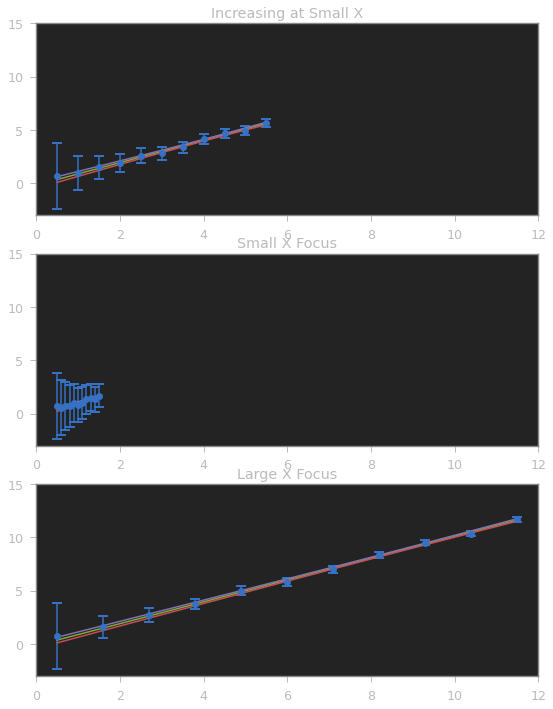

In [19]:
init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plot3.plot(xi,middle)
plot3.plot(xi,lower)
plot3.plot(xi,upper)

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Large X Range')

figure2

In [20]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head(10)

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,None,1.014308,0.027378,-0.010761,0.092842
1,Uniform,1.014308,0.027378,-0.010761,0.092842
2,Increasing,0.916191,0.038055,0.209209,0.038774
3,Endpoints,0.936573,0.078712,0.231318,0.201353
4,Increasing at Small X,1.053044,0.034809,-0.164996,0.150596
5,Small X Range,1.185481,0.152140,-0.168787,0.183235
6,Large X Range,1.025144,0.015972,-0.160622,0.141635


## Conclusions

1. If the uncertainties are increasing with decreasing $x$, we are actually better off, in both the determination of the slope $and$ the y-intercept, to INCREASE the range of $x$ of the measurements!
